#  Import Necessary libraries

In [55]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
zoo_data=pd.read_csv("zoo.csv")
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Data Understanding

In [3]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
zoo_data.duplicated().sum()

0

In [5]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo_data.shape

(101, 18)

In [7]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


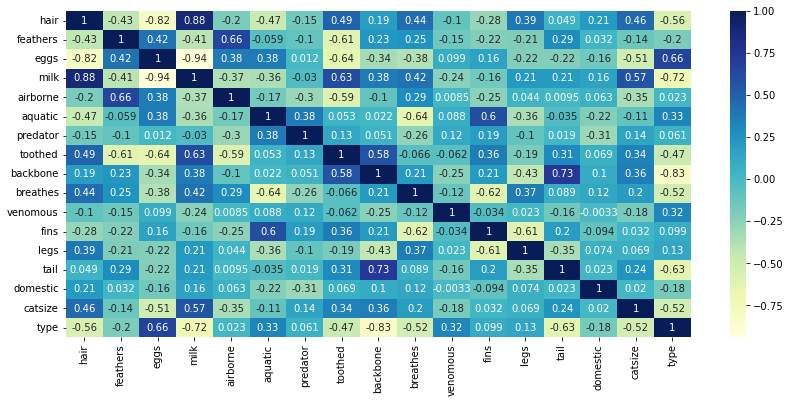

In [54]:
plt.figure(figsize=(14,6))
sns.heatmap(zoo_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [8]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [9]:
zoo_data["animal name"].nunique()

100

In [10]:
zoo_data["animal name"].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [11]:
zoo_data["animal name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [12]:
zoo_data.groupby(by='animal name')['type'].sum().sort_values(ascending=False) #Chain methods

animal name
frog        10
octopus      7
lobster      7
worm         7
scorpion     7
            ..
hare         1
hamster      1
seal         1
sealion      1
aardvark     1
Name: type, Length: 100, dtype: int64

In [13]:
zoo_data.groupby(by=['type','animal name']).sum() #Chain methods

hair  feathers  eggs  milk  airborne  aquatic  predator  \
type animal name                                                            
1    aardvark        1         0     0     1         0        0         1   
     antelope        1         0     0     1         0        0         0   
     bear            1         0     0     1         0        0         1   
     boar            1         0     0     1         0        0         1   
     buffalo         1         0     0     1         0        0         0   
...                ...       ...   ...   ...       ...      ...       ...   
7    scorpion        0         0     0     0         0        0         1   
     seawasp         0         0     1     0         0        1         1   
     slug            0         0     1     0         0        0         0   
     starfish        0         0     1     0         0        1         1   
     worm            0         0     1     0         0        0         0   

                  toothed  backbone  breathes  venomous  fins  legs  tail  \
type animal name                                                            
1    aardvark           1         1         1         0     0     4     0   
     antelope           1         1         1         0     0     4     1   
     bear               1         1         1         0     0     4     0   
     boar               1         1         1         0     0     4     1   
     buffalo            1         1         1         0     0     4     1   
...                   ...       ...       ...       ...   ...   ...   ...   
7    scorpion           0         0         1         1     0     8     1   
     seawasp            0         0         0         1     0     0     0   
     slug               0         0         1         0     0     0     0   
     starfish           0         0         0         0     0     5     0   
     worm               0         0         1         0     0     0     0   

                  domestic  catsize  
type animal name                     
1    aardvark            0        1  
     antelope            0        1  
     bear                0        1  
     boar                0        1  
     buffalo             0        1  
...                    ...      ...  
7    scorpion            0        0  
     seawasp             0        0  
     slug                0        0  
     starfish            0        0  
     worm                0        0  

[100 rows x 16 columns]

## Checking for Imbalanced Dataset:

In [14]:
zoo_data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

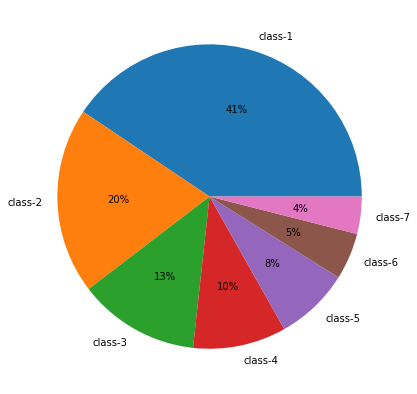

In [15]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.pie(x =zoo_data['type'].value_counts(),labels=["class-1","class-2","class-3","class-4","class-5","class-6","class-7"],autopct='%1.0f%%',data=zoo_data)
plt.show()

## Data Preprocessing:

In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [19]:
zoo_data_1=zoo_data.copy()
zoo_data_1.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [20]:
X =zoo_data_1.drop(['type','animal name'],axis = 1)
y =zoo_data_1[['type']]

In [21]:
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [22]:
X.shape,y.shape

((101, 16), (101, 1))

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,stratify=y,random_state=None)

In [24]:
X_train.shape,y_train.shape

((80, 16), (80, 1))

In [25]:
X_test.shape,y_test.shape

((21, 16), (21, 1))

## Model Building || Model Training

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

###  K=3

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred = knn_model.predict(X_train)

In [29]:
accuracy_score(y_train,y_pred)

1.0

### K=5

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.9625

### K=7

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.9375

### K=9

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.9

##  Getting Optimal number for the K -value

In [33]:
from sklearn.model_selection import cross_val_score

## 1. Cross validation score plot:

In [34]:
container_cv_scores = []

for i in range(2,31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(estimator =knn_model, X = X_train,y=y_train,cv = 5)
    container_cv_scores.append(cv_scores.mean())
container_cv_scores

[0.925,
 0.925,
 0.9375,
 0.9125,
 0.9,
 0.875,
 0.875,
 0.8375,
 0.825,
 0.825,
 0.8375,
 0.8375,
 0.825,
 0.825,
 0.825,
 0.8125,
 0.8125,
 0.8125,
 0.8,
 0.8,
 0.775,
 0.7625,
 0.75,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.6875]

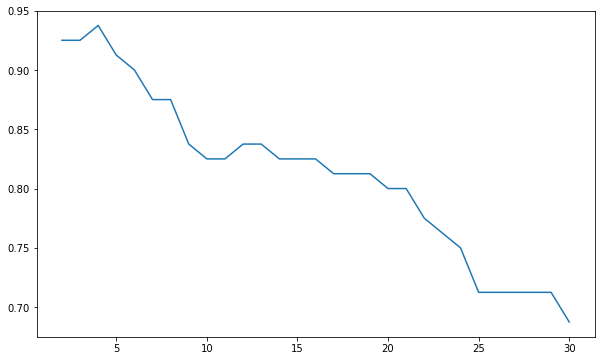

In [35]:
plt.figure(figsize=(10,6))
from matplotlib import pyplot as plt
plt.plot(range(2,31),container_cv_scores)

In [36]:
max(container_cv_scores)

0.9375

In [37]:
container_cv_scores.index(max(container_cv_scores)) #This returns the index number. Wkt, index number starts from 0.

2

##  2.Train accuracy vs Test accuracy plot:

In [38]:
container_train_accuracy = []
container_test_accuracy = []


for i in range(2,31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    y_pred = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train,y_pred)
    y_test_pred=knn_model.predict(X_test)
    test_acc=accuracy_score(y_test,y_test_pred)
    container_train_accuracy.append(train_acc)
    container_test_accuracy.append(test_acc)

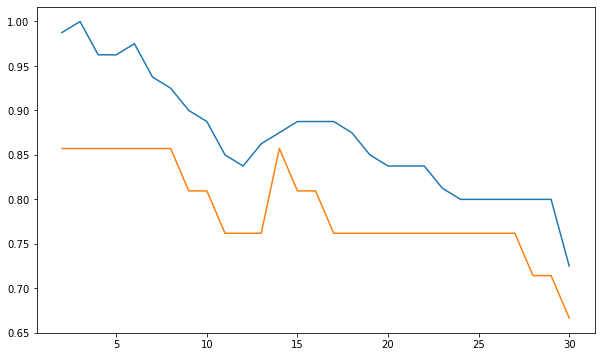

In [39]:
plt.figure(figsize=(10,6))
from matplotlib import pyplot as plt
plt.plot(range(2,31),container_train_accuracy)
plt.plot(range(2,31),container_test_accuracy)

In [40]:
acc_dataframe=pd.DataFrame({"train_acc":container_train_accuracy,"test_acc":container_test_accuracy})
acc_dataframe

,train_acc,test_acc
0,0.9875,0.857143
1,1.0000,0.857143
2,0.9625,0.857143
3,0.9625,0.857143
4,0.9750,0.857143
5,0.9375,0.857143
6,0.9250,0.857143
7,0.9000,0.809524
8,0.8875,0.809524
9,0.8500,0.761905


###  Observation:

#### from above analysis we get :


#### K =5 (optimal number)

###  K =5  is the optimal number

### Model building

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

####  Prediction (Traindata)

In [42]:
y_pred = knn_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.9625

In [56]:
confusion_matrix(y_train,y_pred)

array([[33,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  2,  6]], dtype=int64)

In [58]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        16
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        10
           5       1.00      0.67      0.80         3
           6       0.75      1.00      0.86         6
           7       1.00      0.75      0.86         8

    accuracy                           0.96        80
   macro avg       0.94      0.92      0.91        80
weighted avg       0.97      0.96      0.96        80



In [43]:
y_pred

array([1, 1, 6, 4, 2, 4, 1, 1, 1, 1, 2, 1, 2, 1, 4, 6, 7, 1, 2, 5, 1, 1,
       2, 2, 1, 7, 2, 3, 1, 6, 2, 1, 1, 3, 4, 6, 2, 1, 2, 6, 1, 4, 2, 4,
       7, 6, 1, 4, 5, 1, 2, 6, 1, 2, 2, 2, 1, 4, 1, 4, 1, 2, 1, 3, 1, 4,
       3, 1, 3, 6, 1, 1, 1, 7, 1, 7, 1, 1, 1, 7], dtype=int64)

####  Prediction (Test data)

In [44]:
y_test_pred=knn_model.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.8571428571428571

In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2

    accuracy                           0.86        21
   macro avg       0.69      0.64      0.65        21
weighted avg       0.87      0.86      0.85        21



In [45]:
y_test_pred

array([2, 2, 6, 1, 4, 1, 2, 4, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 7, 6, 4],
      dtype=int64)